# Capstone 3: Step 4 - Pre-processing and Training Data Development

### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   **Pre-processing and Training Data Development**

5.  Modeling
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet
# print the current working directory
print(os.getcwd())

C:\Users\Nancy\Documents\GitHub\Springboard\Capstone 3 elementary OS revenue projection


In [2]:
pd.set_option('display.max_columns',None)

## Load the data

In [45]:
df=pd.read_csv('data\step2_output.csv')

In [46]:
# change the Created (UTC) to a datetime object
df['Created (UTC)']=pd.to_datetime(df['Created (UTC)'])

In [76]:
df_test = pd.DataFrame(
[['2019-10-08', 219.0], ['2019-10-09', 291.0], ['2019-10-10', 278.0], ['2019-10-11', 369.0], ['2019-10-12', 261.46000000000004], ['2019-10-13', 284.0], ['2019-10-14', 241.0], ['2019-10-15', 341.0], ['2019-10-16', 299.0], ['2019-10-17', 192.0], ['2019-10-18', 207.99], ['2019-10-19', 327.0], ['2019-10-20', 317.0], ['2019-10-21', 341.0], ['2019-10-22', 185.0], ['2019-10-23', 227.0], ['2019-10-24', 271.31], ['2019-10-25', 314.0], ['2019-10-26', 395.0], ['2019-10-27', 227.0], ['2019-10-28', 181.0], ['2019-10-29', 207.0], ['2019-10-30', 138.0], ['2019-10-31', 256.0], ['2019-11-01', 351.2], ['2019-11-02', 264.0], ['2019-11-03', 223.0], ['2019-11-04', 250.0], ['2019-11-05', 244.0], ['2019-11-06', 156.0], ['2019-11-07', 327.5], ['2019-11-08', 291.0], ['2019-11-09', 309.0], ['2019-11-10', 345.0], ['2019-11-11', 274.0], ['2019-11-12', 260.0], ['2019-11-13', 350.0], ['2019-11-14', 229.0], ['2019-11-15', 281.0], ['2019-11-16', 303.5], ['2019-11-17', 294.0], ['2019-11-18', 211.0], ['2019-11-19', 556.0], ['2019-11-20', 256.0], ['2019-11-21', 130.0], ['2019-11-22', 287.99], ['2019-11-23', 258.27], ['2019-11-24', 265.0], ['2019-11-25', 234.99], ['2019-11-26', 219.69], ['2019-11-27', 274.0], ['2019-11-28', 283.0], ['2019-11-29', 323.0], ['2019-11-30', 177.0], ['2019-12-01', 244.0], ['2019-12-02', 123.0], ['2019-12-03', 1505.5], ['2019-12-04', 5270.0599999999995], ['2019-12-05', 3897.58], ['2019-12-06', 2093.25], ['2019-12-07', 1591.43], ['2019-12-08', 1378.49], ['2019-12-09', 1025.2], ['2019-12-10', 925.23], ['2019-12-11', 1017.0], ['2019-12-12', 868.7], ['2019-12-13', 1004.0], ['2019-12-14', 892.59], ['2019-12-15', 816.0], ['2019-12-16', 510.95], ['2019-12-17', 455.33000000000004], ['2019-12-18', 415.0], ['2019-12-19', 536.78], ['2019-12-20', 447.0], ['2019-12-21', 612.0], ['2019-12-22', 471.25], ['2019-12-23', 445.0], ['2019-12-24', 336.0], ['2019-12-25', 366.5], ['2019-12-26', 465.0], ['2019-12-27', 524.0], ['2019-12-28', 385.0], ['2019-12-29', 327.0], ['2019-12-30', 380.0], ['2019-12-31', 300.0], ['2020-01-01', 271.0], ['2020-01-02', 518.0], ['2020-01-03', 371.0], ['2020-01-04', 522.0], ['2020-01-05', 430.0], ['2020-01-06', 358.0], ['2020-01-07', 334.0], ['2020-01-08', 413.0], ['2020-01-09', 470.0], ['2020-01-10', 392.93], ['2020-01-11', 389.0], ['2020-01-12', 309.5], ['2020-01-13', 274.0], ['2020-01-14', 420.0], ['2020-01-15', 468.8], ['2020-01-16', 306.0], ['2020-01-17', 464.5], ['2020-01-18', 551.0], ['2020-01-19', 454.0], ['2020-01-20', 423.0], ['2020-01-21', 377.0], ['2020-01-22', 292.0], ['2020-01-23', 272.03999999999996], ['2020-01-24', 434.0], ['2020-01-25', 443.0], ['2020-01-26', 395.0], ['2020-01-27', 387.7], ['2020-01-28', 317.49], ['2020-01-29', 323.5], ['2020-01-30', 386.0], ['2020-01-31', 255.32], ['2020-02-01', 394.0], ['2020-02-02', 386.0], ['2020-02-03', 607.99], ['2020-02-04', 476.0], ['2020-02-05', 294.29], ['2020-02-06', 419.0], ['2020-02-07', 513.0], ['2020-02-08', 596.5], ['2020-02-09', 671.0], ['2020-02-10', 504.0], ['2020-02-11', 484.0], ['2020-02-12', 230.0]],
columns=['ds', 'Amount'])
df_test['ds']=pd.to_datetime(df_test['ds'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      128 non-null    datetime64[ns]
 1   Amount  128 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB
None
          ds  Amount
0 2019-10-08  219.00
1 2019-10-09  291.00
2 2019-10-10  278.00
3 2019-10-11  369.00
4 2019-10-12  261.46
            ds  Amount
123 2020-02-08   596.5
124 2020-02-09   671.0
125 2020-02-10   504.0
126 2020-02-11   484.0
127 2020-02-12   230.0


In [47]:
df.head()

,id,Type,Source,Amount,Fee,Destination Platform Fee,Net,Currency,Created (UTC),Available On (UTC),Description,Customer Facing Amount,Customer Facing Currency,Transfer,Transfer Date (UTC),Transfer Group,receipt (metadata),products (metadata),name (metadata),email (metadata),phone (metadata),order (metadata)
0,txn_1GBJrbAEZE0DjbbjOABqgiGC,charge,ch_1GBJraAEZE0DjbbjwhZkbSb9,1.0,0.34,NaN,0.66,usd,2020-02-12,2/14/2020 0:00,Hera 5.1.2,1.0,usd,po_1GBWqWAEZE0Djbbjm0pR6Atb,2/14/2020 0:00,NaN,True,"[""ISO-5.1.2""]",NaN,NaN,NaN,NaN
1,txn_1GBJNFAEZE0Djbbj15eGuWiU,charge,ch_1GBJNDAEZE0DjbbjJQGaP3W8,10.0,0.69,NaN,9.31,usd,2020-02-12,2/14/2020 0:00,Hera 5.1.2,10.0,usd,po_1GBWqWAEZE0Djbbjm0pR6Atb,2/14/2020 0:00,NaN,True,"[""ISO-5.1.2""]",NaN,NaN,NaN,NaN
2,txn_1GBJ78AEZE0DjbbjKP45w8mj,charge,ch_1GBJ77AEZE0DjbbjYlUt3pGR,20.0,1.08,NaN,18.92,usd,2020-02-12,2/14/2020 0:00,Hera 5.1.2,20.0,usd,po_1GBWqWAEZE0Djbbjm0pR6Atb,2/14/2020 0:00,NaN,True,"[""ISO-5.1.2""]",NaN,NaN,NaN,NaN
3,txn_1GBJ0CAEZE0DjbbjNdIcjoDx,charge,ch_1GBJ0BAEZE0DjbbjMoqEGkkv,5.0,0.50,NaN,4.50,usd,2020-02-12,2/14/2020 0:00,Hera 5.1.2,5.0,usd,po_1GBWqWAEZE0Djbbjm0pR6Atb,2/14/2020 0:00,NaN,True,"[""ISO-5.1.2""]",NaN,NaN,NaN,NaN
4,txn_1GBIlJAEZE0Djbbjb2ag9LIV,charge,ch_1GBIlIAEZE0DjbbjzgGn8zJ7,5.0,0.50,NaN,4.50,usd,2020-02-12,2/14/2020 0:00,Hera 5.1.2,5.0,usd,po_1GBWqWAEZE0Djbbjm0pR6Atb,2/14/2020 0:00,NaN,True,"[""ISO-5.1.2""]",NaN,NaN,NaN,NaN


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,8742.0,7.072215,7.731499,1.00,1.00,5.0,10.00,340.00
Fee,8742.0,0.545689,0.275395,0.33,0.34,0.5,0.69,13.56
Destination Platform Fee,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net,8742.0,6.526526,7.461190,0.66,0.67,4.5,9.41,326.44
Customer Facing Amount,8742.0,7.072215,7.731499,1.00,1.00,5.0,10.00,340.00
Transfer Group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name (metadata),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email (metadata),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone (metadata),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order (metadata),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# only use data through the end of June 2020
mask = (df['Created (UTC)'] < '2020-7-1')
dfkeep = df.loc[mask]

## Create dataframe indexed by date

In [50]:
dfsum = dfkeep.groupby([dfkeep['Created (UTC)'].dt.date])[['Amount']].sum()

In [51]:
print(dfsum.head())
print(dfsum.tail())

               Amount
Created (UTC)        
2019-10-08     219.00
2019-10-09     291.00
2019-10-10     278.00
2019-10-11     369.00
2019-10-12     261.46
               Amount
Created (UTC)        
2020-02-08      596.5
2020-02-09      671.0
2020-02-10      504.0
2020-02-11      484.0
2020-02-12      230.0


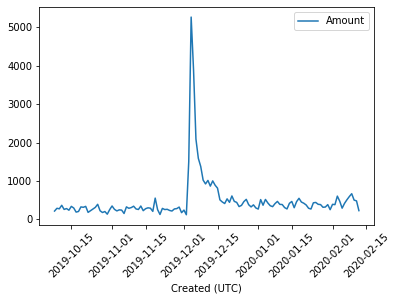

In [52]:
# plot the time series
dfsum.plot(rot=45)

# Capstone 3: Step 5 - Modeling

In [53]:
# load holidays dataframe
holidays=pd.read_csv('data\holidays.csv',parse_dates=['ds'])

In [54]:
# instantiate Prophet model
model1=Prophet(holidays=holidays, yearly_seasonality = False, weekly_seasonality = False)

In [55]:
# reformat data to match Prophet requirements
dfmodel = dfsum
dfmodel.columns=['y_orig']
dfmodel['ds']=dfmodel.index
dfmodel.head()

,y_orig,ds
Created (UTC),,
2019-10-08,219.00,2019-10-08
2019-10-09,291.00,2019-10-09
2019-10-10,278.00,2019-10-10
2019-10-11,369.00,2019-10-11
2019-10-12,261.46,2019-10-12


In [56]:
# log transform the y variable to try to convert from non-stationary to stationary
dfmodel['y']=np.log(dfmodel['y_orig'])

In [57]:
# Split data between train and test
split=int(len(dfmodel) * 0.8) 
# Make train and test variables, with 'train, test'
train, test = dfmodel[0:split], dfmodel[split:len(dfmodel)]

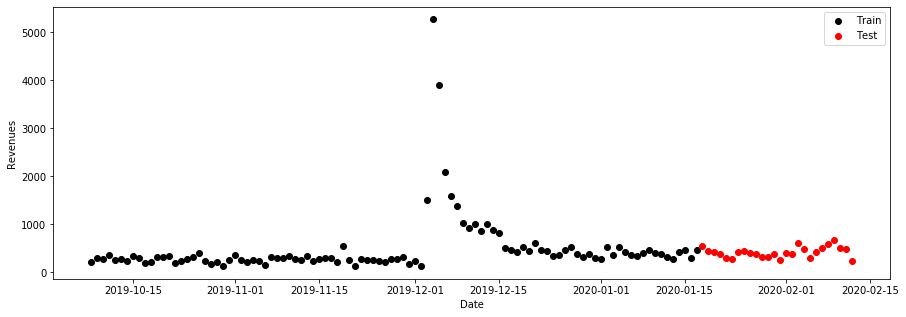

In [58]:
# plot data
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train['ds'], train['y_orig'], linestyle='None', marker='o', color='black', label='Train')
ax.plot(test['ds'], test['y_orig'], linestyle='None', marker='o', color='red', label='Test')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Revenues');

### Fit the model on the training dataset

In [59]:
# fit Prophet model with training data
model1.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### run predict on all of the data (both train and test)

In [60]:
forecast = model1.predict(dfmodel)

In [61]:
pd.set_option('display.max_rows',1500)

In [62]:
forecast.describe().T

,count,mean,std,min,25%,50%,75%,max
trend,128.0,5.924394,0.229258,5.374500,5.798862,5.979463,6.102461,6.204014
yhat_lower,128.0,5.232773,0.230213,4.672908,5.115758,5.293847,5.403859,5.561771
yhat_upper,128.0,6.613476,0.226441,6.070089,6.502598,6.663121,6.785771,6.919479
trend_lower,128.0,5.920587,0.229580,5.374500,5.798862,5.976105,6.102461,6.204014
trend_upper,128.0,5.928653,0.229425,5.374500,5.798862,5.985952,6.102461,6.204014
Forbes Article,128.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Forbes Article_lower,128.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Forbes Article_upper,128.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Freya 0.3.2,128.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Freya 0.3.2_lower,128.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


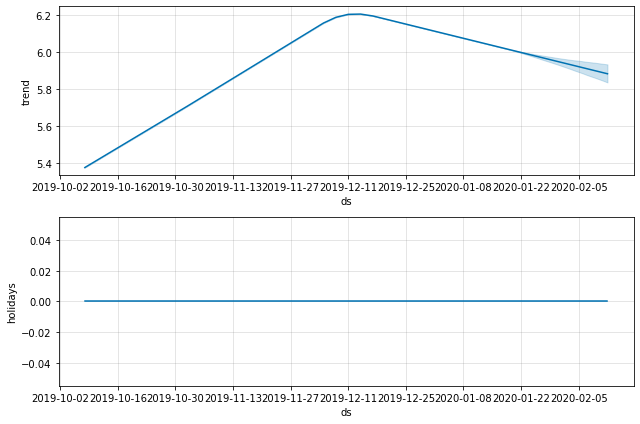

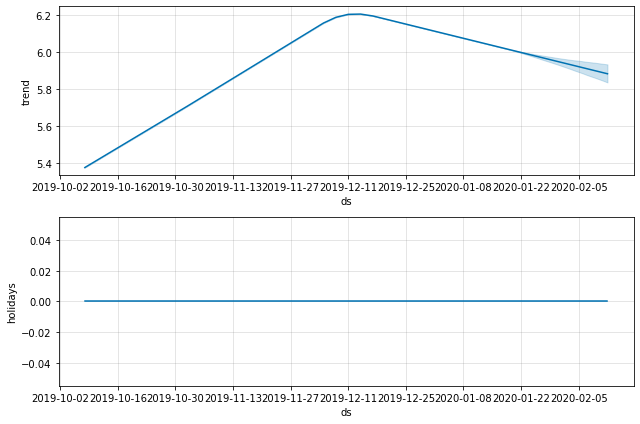

In [63]:
# plot outcomes
model1.plot_components(forecast)

### Plot forecast, train and test dataset

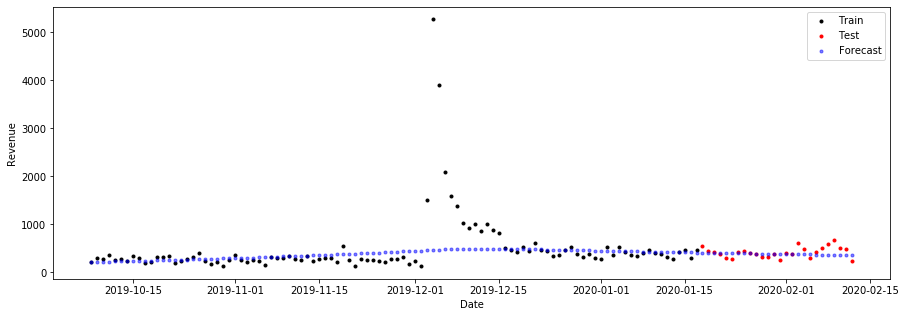

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train['ds'], train['y_orig'], c='black', marker='o', ms=3, linestyle='None', label='Train')
ax.plot(test['ds'], test['y_orig'], c='r', marker='o', ms=3, linestyle='None', label='Test')
ax.plot(forecast['ds'], np.exp(forecast['yhat']), c='b', marker='o', ms=3, linestyle='None', label='Forecast', alpha=0.5)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Revenue');

In [65]:
holidays

,ds,holiday,lower_window,upper_window
0,2016-03-01,Freya 0.3.2,0,5
1,2016-09-09,Loki 0.4.0,0,5
2,2016-09-13,Loki 0.4.1,0,5
3,2017-01-04,Unknown 01,0,5
4,2018-01-18,Unknown 02,0,5
5,2018-10-16,Juno 5.0,0,5
6,2018-12-29,Unknown 03,0,5
7,2019-12-03,Hera 5.1,0,5
8,2019-12-04,Forbes Article,0,5
9,2020-02-06,Hera 5.1.2,0,5


In [66]:
forecast.loc[forecast.ds=='2019-12-04']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Forbes Article,Forbes Article_lower,Forbes Article_upper,Freya 0.3.2,Freya 0.3.2_lower,Freya 0.3.2_upper,Hera 5.1,Hera 5.1_lower,Hera 5.1_upper,Hera 5.1.2,Hera 5.1.2_lower,Hera 5.1.2_upper,Hera 5.1.3,Hera 5.1.3_lower,Hera 5.1.3_upper,Hera 5.1.4,Hera 5.1.4_lower,Hera 5.1.4_upper,Hera 5.1.5,Hera 5.1.5_lower,Hera 5.1.5_upper,Hera 5.1.6,Hera 5.1.6_lower,Hera 5.1.6_upper,Juno 5.0,Juno 5.0_lower,Juno 5.0_upper,Loki 0.4.0,Loki 0.4.0_lower,Loki 0.4.0_upper,Loki 0.4.1,Loki 0.4.1_lower,Loki 0.4.1_upper,Unknown 01,Unknown 01_lower,Unknown 01_upper,Unknown 02,Unknown 02_lower,Unknown 02_upper,Unknown 03,Unknown 03_lower,Unknown 03_upper,Unknown 04,Unknown 04_lower,Unknown 04_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
57,2019-12-04,6.14204,5.480024,6.803904,6.14204,6.14204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.14204


In [75]:
for i, row in dfsum.iterrows():
    date_idx = i
    all_row = row['y_orig']
    print(date_idx, all_row)

2019-10-08 219.0
2019-10-09 291.0
2019-10-10 278.0
2019-10-11 369.0
2019-10-12 261.46000000000004
2019-10-13 284.0
2019-10-14 241.0
2019-10-15 341.0
2019-10-16 299.0
2019-10-17 192.0
2019-10-18 207.99
2019-10-19 327.0
2019-10-20 317.0
2019-10-21 341.0
2019-10-22 185.0
2019-10-23 227.0
2019-10-24 271.31
2019-10-25 314.0
2019-10-26 395.0
2019-10-27 227.0
2019-10-28 181.0
2019-10-29 207.0
2019-10-30 138.0
2019-10-31 256.0
2019-11-01 351.2
2019-11-02 264.0
2019-11-03 223.0
2019-11-04 250.0
2019-11-05 244.0
2019-11-06 156.0
2019-11-07 327.5
2019-11-08 291.0
2019-11-09 309.0
2019-11-10 345.0
2019-11-11 274.0
2019-11-12 260.0
2019-11-13 350.0
2019-11-14 229.0
2019-11-15 281.0
2019-11-16 303.5
2019-11-17 294.0
2019-11-18 211.0
2019-11-19 556.0
2019-11-20 256.0
2019-11-21 130.0
2019-11-22 287.99
2019-11-23 258.27
2019-11-24 265.0
2019-11-25 234.99
2019-11-26 219.69
2019-11-27 274.0
2019-11-28 283.0
2019-11-29 323.0
2019-11-30 177.0
2019-12-01 244.0
2019-12-02 123.0
2019-12-03 1505.5
2019-12-04 